### `Description`

Twitter posses 330 million monthly active users, which allows businesses to reach a broad population and connect with customers without intermediaries. On the other side, there’s so much information that it’s difficult for brands to quickly detect negative social mentions that could harm their business.
That's why sentiment analysis/classification, which involves monitoring emotions in conversations on social media platforms, has become a key strategy in social media marketing.

Listening to how customers feel about the product/services on Twitter allows companies to understand their audience, keep on top of what’s being said about their brand, and their competitors, and discover new trends in the industry.
 
 
 
### `Data Description`

A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").
 
 
### `Dataset`

The dataset has the following columns:
•	tweet_id                                                           
•	airline_sentiment                                               
•	airline_sentiment_confidence                               
•	negativereason                                                   
•	negativereason_confidence                                    
•	airline                                                                    
•	airline_sentiment_gold                                                                         
•	name                                                                                         
•	negativereason_gold                                                                              
•	retweet_count                                                                                       
•	text                                                                                            
•	tweet_coord                                                                                       
•	tweet_created                                                                                            
•	tweet_location                                                                                 
•	user_timezone                                                                   


### `Objective`

To implement the techniques learned as a part of the course.

### `Learning Outcomes`

•	Basic understanding of text pre-processing.                                                                    
•	What to do after text pre-processing                                                                  
•	Bag of words                                                                                                
•	Tf-idf                                                                                       
•	Build the classification model.                                                                
•	Evaluate the Model                                                                                  

In [20]:
!pip install wordcloud
import re, string, unicodedata                                          #Used for Text PreProcessing
import numpy as np 
import random
import pandas as pd 
import matplotlib.pyplot as plt                                         # Used for plotting
import seaborn as sns                                                   # Used for plotting
from collections import Counter                                           # count the key-value pairs in an object

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator           # Used for plotting the wordcloud of a corpus
import nltk                                                               # Used for different task of NLP
from nltk.corpus import stopwords                                         # Used for removal of stop words
import warnings                                                           
warnings.filterwarnings("ignore")
from nltk.stem.porter import PorterStemmer                                #Used for Stemming of words in the corpus

import re, string, unicodedata

from bs4 import BeautifulSoup                 # Beautiful soup is a parsing library that can use different parsers.
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords, wordnet    # Stopwords, and wordnet corpus
from nltk.stem import LancasterStemmer, WordNetLemmatizer

In [49]:
tweets=pd.read_csv('Tweets.csv')                             #Importing the data

In [50]:
tweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [51]:
tweets.shape

(14640, 15)

In [52]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [53]:
#Dropping colums
tweets.drop(['tweet_id', 'airline_sentiment_confidence','negativereason','negativereason_confidence','airline','airline_sentiment_gold',
             'name','negativereason_gold','retweet_count','tweet_coord','tweet_created','tweet_location','user_timezone'],axis=1,inplace=True)
tweets.shape

(14640, 2)

In [54]:
tweets.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


In [55]:
tweets.describe()

,airline_sentiment,text
count,14640,14640
unique,3,14427
top,negative,@united thanks
freq,9178,6


Text(0.5, 0.98, 'Characters in message')

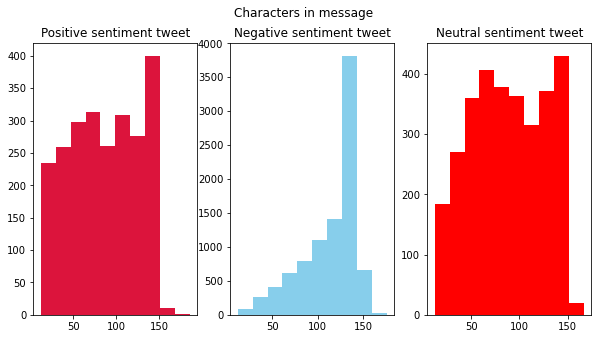

In [56]:
#Number of characters in tweets
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(10,5))
tweet_len = tweets[tweets['airline_sentiment']=='positive']['text'].str.len()
ax1.hist(tweet_len,color='crimson')
ax1.set_title('Positive sentiment tweet')
tweet_len = tweets[tweets['airline_sentiment']=='negative']['text'].str.len()
ax2.hist(tweet_len,color='skyblue')
ax2.set_title('Negative sentiment tweet')
tweet_len = tweets[tweets['airline_sentiment']=='neutral']['text'].str.len()
ax3.hist(tweet_len,color='red')
ax3.set_title('Neutral sentiment tweet')
fig.suptitle('Characters in message')

Text(0.5, 0.98, 'Words in a tweet')

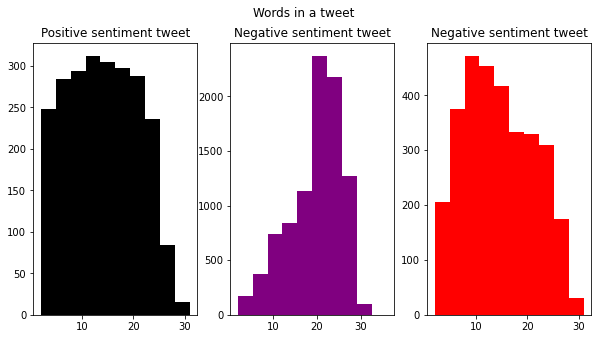

In [57]:
#Number of words in a tweet
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(10,5))
tweet_len = tweets[tweets['airline_sentiment']=='positive']['text'].str.split().map(lambda x: len(x))
ax1.hist(tweet_len, color='black')
ax1.set_title('Positive sentiment tweet')
tweet_len = tweets[tweets['airline_sentiment']=='negative']['text'].str.split().map(lambda x: len(x))
ax2.hist(tweet_len,color='purple')
ax2.set_title('Negative sentiment tweet')
tweet_len = tweets[tweets['airline_sentiment']=='neutral']['text'].str.split().map(lambda x: len(x))
ax3.hist(tweet_len,color='red')
ax3.set_title('Negative sentiment tweet')
fig.suptitle('Words in a tweet')

## Data Preprocessing:

### Text Preprocessing - removal of http links

In [58]:
# Removal of the http link using Regular Expression.
for i, row in tweets.iterrows():
    clean_tweet = re.sub(r"http\S+", "", tweets.at[i, 'text'])
    tweets.at[i,'text'] = clean_tweet
tweets.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


In [59]:
 import nltk
 nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vsudh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Pre Processing : Removal of number

In [60]:
def remove_numbers(text):
  text = re.sub(r'\d+', '', text)
  return text

tweets['text'] = tweets['text'].apply(lambda x: remove_numbers(x))
tweets.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


### Pre Processing - Tokenization

In [61]:
tweets['text'] = tweets.apply(lambda row: nltk.word_tokenize(row['text']), axis=1) # Tokenization of data
tweets.head()

,airline_sentiment,text
0,neutral,"[@, VirginAmerica, What, @, dhepburn, said, .]"
1,positive,"[@, VirginAmerica, plus, you, 've, added, comm..."
2,neutral,"[@, VirginAmerica, I, did, n't, today, ..., Mu..."
3,negative,"[@, VirginAmerica, it, 's, really, aggressive,..."
4,negative,"[@, VirginAmerica, and, it, 's, a, really, big..."


### Remove non-ascii character

In [62]:
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []                        # Create empty list to store pre-processed words.
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)        # Append processed words to new list.
    return new_words

In [63]:
tweets['text'] = tweets['text'].apply(lambda x: remove_non_ascii(x))
tweets.head()

,airline_sentiment,text
0,neutral,"[@, VirginAmerica, What, @, dhepburn, said, .]"
1,positive,"[@, VirginAmerica, plus, you, 've, added, comm..."
2,neutral,"[@, VirginAmerica, I, did, n't, today, ..., Mu..."
3,negative,"[@, VirginAmerica, it, 's, really, aggressive,..."
4,negative,"[@, VirginAmerica, and, it, 's, a, really, big..."


### Preprocessing-Lowercase

In [64]:
def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []                        # Create empty list to store pre-processed words.
    for word in words:
        new_word = word.lower()           # Converting to lowercase
        new_words.append(new_word)        # Append processed words to new list.
    return new_words

In [65]:
tweets['text'] = tweets['text'].apply(lambda x: to_lowercase(x))
tweets.head()

,airline_sentiment,text
0,neutral,"[@, virginamerica, what, @, dhepburn, said, .]"
1,positive,"[@, virginamerica, plus, you, 've, added, comm..."
2,neutral,"[@, virginamerica, i, did, n't, today, ..., mu..."
3,negative,"[@, virginamerica, it, 's, really, aggressive,..."
4,negative,"[@, virginamerica, and, it, 's, a, really, big..."


### Preprocessing: Removal of Punctuation

In [66]:
def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []                        # Create empty list to store pre-processed words.
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)    # Append processed words to new list.
    return new_words

In [67]:
tweets['text'] = tweets['text'].apply(lambda x: remove_punctuation(x))
tweets.head()

,airline_sentiment,text
0,neutral,"[virginamerica, what, dhepburn, said]"
1,positive,"[virginamerica, plus, you, ve, added, commerci..."
2,neutral,"[virginamerica, i, did, nt, today, must, mean,..."
3,negative,"[virginamerica, it, s, really, aggressive, to,..."
4,negative,"[virginamerica, and, it, s, a, really, big, ba..."


### Pre-Processing - Removal of stopwords

In [68]:
import nltk
nltk.download('stopwords')      #Downloading nltk corpus

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vsudh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [69]:
stopwords = stopwords.words('english')

In [70]:
def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []                        # Create empty list to store pre-processed words.
    for word in words:
        if word not in stopwords:
            new_words.append(word)        # Append processed words to new list.
    return new_words

In [71]:
tweets['text'] = tweets['text'].apply(lambda x: remove_stopwords(x))
tweets.head()

,airline_sentiment,text
0,neutral,"[virginamerica, dhepburn, said]"
1,positive,"[virginamerica, plus, added, commercials, expe..."
2,neutral,"[virginamerica, nt, today, must, mean, need, t..."
3,negative,"[virginamerica, really, aggressive, blast, obn..."
4,negative,"[virginamerica, really, big, bad, thing]"


### Pre-Processing: Lemmatization

In [72]:
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.

In [73]:
import nltk
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vsudh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


In [74]:
def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word))
    return new_words

tweets['text'] = tweets['text'].apply(lambda x: lemmatize_list(x))
tweets.head()

,airline_sentiment,text
0,neutral,"[virginamerica, dhepburn, said]"
1,positive,"[virginamerica, plus, added, commercial, exper..."
2,neutral,"[virginamerica, nt, today, must, mean, need, t..."
3,negative,"[virginamerica, really, aggressive, blast, obn..."
4,negative,"[virginamerica, really, big, bad, thing]"


### Text preprocessing-Normalization(aggregating pre-processing function into one)

In [75]:
def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)
    return ' '.join(words)

tweets['text'] = tweets.apply(lambda row: normalize(row['text']), axis=1)
tweets.head()

,airline_sentiment,text
0,neutral,virginamerica dhepburn said
1,positive,virginamerica plus added commercial experience...
2,neutral,virginamerica nt today must mean need take ano...
3,negative,virginamerica really aggressive blast obnoxiou...
4,negative,virginamerica really big bad thing


## Building the model based on CountVectorizer and Random Forest

In [77]:
# Vectorization (Convert text data to numbers).
from sklearn.feature_extraction.text import CountVectorizer

bow_vec = CountVectorizer(max_features=2000)
data_features = bow_vec.fit_transform(tweets['text'])

data_features = data_features.toarray()

In [90]:
data_features.shape

(14640, 2000)

### Term Frequency(TF) - Inverse Document Frequency(IDF)

In [91]:
# Using TfidfVectorizer to convert text data to numbers.

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=2000)
data_features = vectorizer.fit_transform(tweets['text'])

data_features = data_features.toarray()

data_features.shape

(14640, 2000)